# Wine Classifier (Neural Network)

This is a simple wine classifier based on the `sklearn` wine dataset, which uses neural networks as a form of unsupervised learning.

In [16]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

device = ("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


Let us now load in the dataset, normalize the features, and split it into training and test sets. We are using a 80/20 split here.

In [28]:
# Load the wine dataset
wine = load_wine(as_frame=True)
X = wine.data.values
y = wine.target.values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to pytorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Alright, lets now define our model class. 

Reasons for using ReLU activation in hidden layer:
- It is easy to compute.
- A simple way to introduce non-linearity.
- Works well for simple problems.

How did we get 8 as the hidden size? 
Average of input and output (13 + 3) / 2 = 6


In [29]:
class WineClassifier(nn.Module):
    def __init__(self, input_size=13, hidden_size=8, num_classes=3):
        super(WineClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

Lets initialize our model, loss function and optimizer.

We are using cross entropy loss as it is suitable for multi-class classification problems.

We are using the Adam optimizer as it is a good default choice that works well without much tuning.

Learning rate is 0.01 as it is often a good default choice.

In [30]:
model = WineClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [31]:
# Define training loop

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()                           # Kind of put the model into training mode
    optimizer.zero_grad()                   # Reset gradient values for parameters
    output = model(X_train)                 # Do a forward pass
    loss = criterion(output, y_train)       # Compute loss
    loss.backward()                         # Do a backward pass
    optimizer.step()                        # Update weights

    # Calculate training accuracy
    _, y_pred = torch.max(output, 1)
    train_accuracy = (y_pred == y_train).sum().item() / y_train.size(0)

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch [10/100], Loss: 0.7773
Train Accuracy: 0.6549, Test Accuracy: 0.8056
Epoch [20/100], Loss: 0.4547
Train Accuracy: 0.8944, Test Accuracy: 0.8889
Epoch [30/100], Loss: 0.2180
Train Accuracy: 0.9577, Test Accuracy: 0.9444
Epoch [40/100], Loss: 0.1025
Train Accuracy: 0.9930, Test Accuracy: 0.9722
Epoch [50/100], Loss: 0.0538
Train Accuracy: 0.9930, Test Accuracy: 1.0000
Epoch [60/100], Loss: 0.0333
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epoch [70/100], Loss: 0.0228
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epoch [80/100], Loss: 0.0168
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epoch [90/100], Loss: 0.0132
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epoch [100/100], Loss: 0.0108
Train Accuracy: 1.0000, Test Accuracy: 1.0000


We can now plot the training loss and the training/test accuracies with the number of epochs.

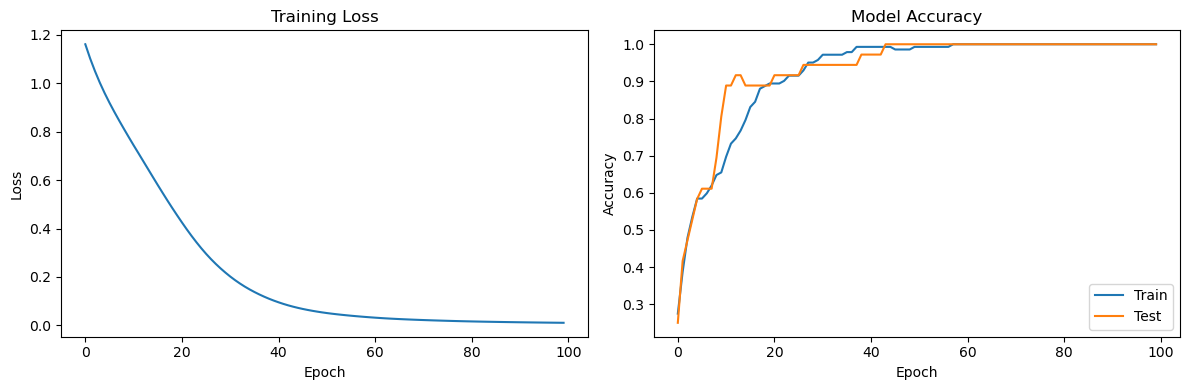

In [32]:
# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Final evaluation
model.eval()
with torch.no_grad():
    final_test_outputs = model(X_test)
    _, final_predicted = torch.max(final_test_outputs.data, 1)
    final_accuracy = (final_predicted == y_test).sum().item() / y_test.size(0)
    print(f'\nFinal Test Accuracy: {final_accuracy:.4f}')


Final Test Accuracy: 1.0000
